## DESCRIPTIVE ANALYSIS

In [371]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [372]:
df=pd.read_csv("datasets/cleandf.csv", parse_dates=['DATEFLOWN'])

In [373]:
df.drop(columns="Unnamed: 0", inplace=True)

In [374]:
df.sample()


,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,...,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID
21618,British Airways,Economy Class,2019-11-01 00:00:00.000000000,18th November 2019,1,1,1,UnitedKingdom,1,no,...,1,4,british-airways,I begrudge flying with them,Family,Leisure,Trip Verified,2,1,bd441be3-675c-41e5-92a3-391434a10c31


In [561]:
df['OVERSEAS']=np.where(df.ENTERTAINMENTRATING==0,0,1)

In [376]:
grouped=df.groupby(["AIRLINENAME", "CABINTYPE", "TRAVELLER", "SCALE_YN","OVERSEAS"]).mean("OVERALLSCORE")

In [377]:
grouped

ENTERTAINMENTRATING  \
AIRLINENAME            CABINTYPE       TRAVELLER SCALE_YN OVERSEAS                        
AB Aviation            Economy Class   Solo      0        0                         0.0   
ANA All Nippon Airways Business Class  Couple    0        0                         0.0   
                                                          1                         4.2   
                                                 1        1                         4.0   
                                       Family    1        1                         1.0   
...                                                                                 ...   
flydubai               Economy Class   Solo      1        1                         1.1   
                       Premium Economy Couple    1        1                         1.0   
                                       Family    0        1                         3.5   
                                       Solo      0        1                         5.0   
                                                 1        1                         1.0   

                                                                    FOODRATING  \
AIRLINENAME            CABINTYPE       TRAVELLER SCALE_YN OVERSEAS               
AB Aviation            Economy Class   Solo      0        0                2.0   
ANA All Nippon Airways Business Class  Couple    0        0                2.5   
                                                          1                4.6   
                                                 1        1                4.0   
                                       Family    1        1                2.0   
...                                                                        ...   
flydubai               Economy Class   Solo      1        1                1.1   
                       Premium Economy Couple    1        1                2.0   
                                       Family    0        1                4.0   
                                       Solo      0        1                2.0   
                                                 1        1                1.0   

                                                                    GROUNDSERVICERATING  \
AIRLINENAME            CABINTYPE       TRAVELLER SCALE_YN OVERSEAS                        
AB Aviation            Economy Class   Solo      0        0                         2.0   
ANA All Nippon Airways Business Class  Couple    0        0                         4.0   
                                                          1                         4.8   
                                                 1        1                         2.5   
                                       Family    1        1                         5.0   
...                                                                                 ...   
flydubai               Economy Class   Solo      1        1                         1.1   
                       Premium Economy Couple    1        1                         2.0   
                                       Family    0        1                         4.0   
                                       Solo      0        1                         1.0   
                                                 1        1                         1.0   

                                                                    OVERALLSCORE  \
AIRLINENAME            CABINTYPE       TRAVELLER SCALE_YN OVERSEAS                 
AB Aviation            Economy Class   Solo      0        0             3.666667   
ANA All Nippon Airways Business Class  Couple    0        0             5.500000   
                                                          1             9.600000   
                                                 1        1             7.500000   
                                       Family    1        1             9.000000   
...                                          

In [378]:
grouped.reset_index(inplace=True)

In [379]:
grouped.sample()

,AIRLINENAME,CABINTYPE,TRAVELLER,SCALE_YN,OVERSEAS,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING
2365,Georgian Airways,Business Class,Solo,0,0,0.0,2.666667,3.0,6.666667,3.333333,4.666667,3.0,0.0


In [380]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AIRLINENAME          5490 non-null   object 
 1   CABINTYPE            5490 non-null   object 
 2   TRAVELLER            5490 non-null   object 
 3   SCALE_YN             5490 non-null   int64  
 4   OVERSEAS             5490 non-null   int32  
 5   ENTERTAINMENTRATING  5490 non-null   float64
 6   FOODRATING           5490 non-null   float64
 7   GROUNDSERVICERATING  5490 non-null   float64
 8   OVERALLSCORE         5490 non-null   float64
 9   SEATCOMFORTRATING    5490 non-null   float64
 10  SERVICERATING        5490 non-null   float64
 11  VALUERATING          5490 non-null   float64
 12  WIFIRATING           5490 non-null   float64
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 536.3+ KB


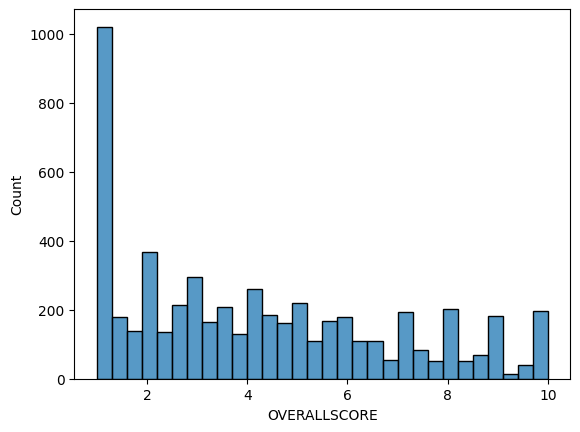

In [381]:
sns.histplot(x=grouped.OVERALLSCORE.dropna(), bins=30);

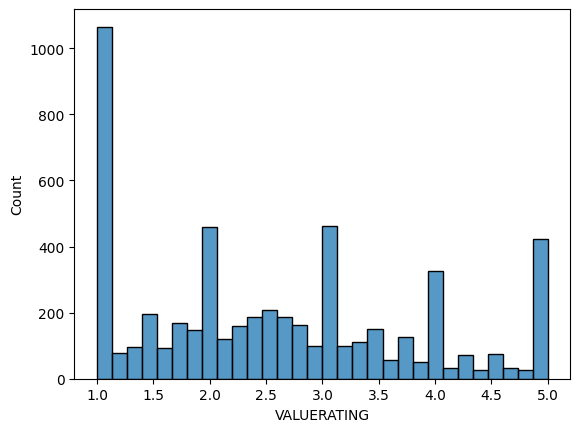

In [382]:
sns.histplot(x=grouped.VALUERATING.dropna(), bins=30);

<Axes: xlabel='OVERALLSCORE', ylabel='SERVICERATING'>

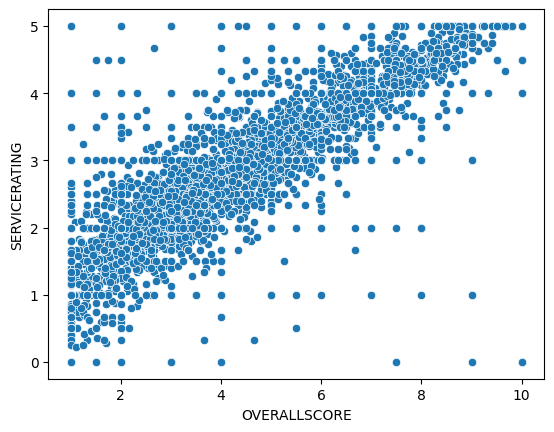

In [383]:
sns.scatterplot(x='OVERALLSCORE', y='SERVICERATING', data=grouped)

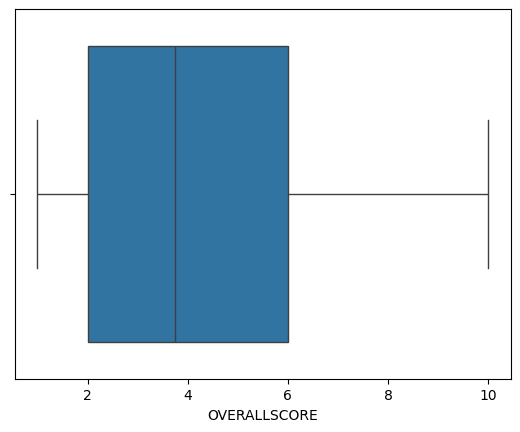

In [384]:
sns.boxplot(x=grouped.OVERALLSCORE)
plt.show()

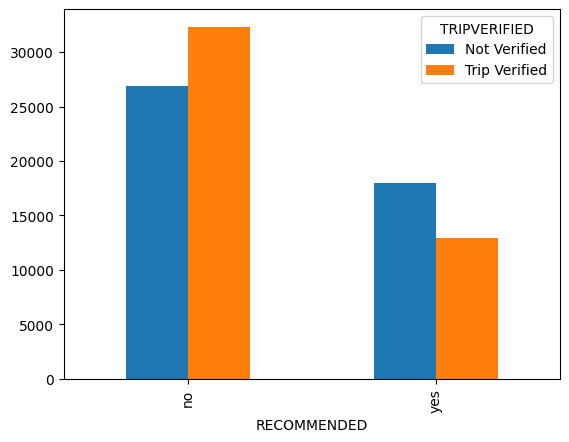

In [385]:
save = df.groupby(["RECOMMENDED", "TRIPVERIFIED"])["RECOMMENDED"].count().unstack().plot(kind="bar")
plt.show()

In [386]:
cabin = df.groupby(["CABINTYPE"]).agg(
    {"VALUERATING": "mean", 
     "SEATCOMFORTRATING": "mean",
      "GROUNDSERVICERATING": "mean", 
      "SERVICERATING": "mean"})

In [387]:
cabin.head()

,VALUERATING,SEATCOMFORTRATING,GROUNDSERVICERATING,SERVICERATING
CABINTYPE,,,,
Business Class,3.277703,3.416221,3.207872,3.662973
Economy Class,2.337886,2.285022,2.191465,2.525709
First Class,2.952795,3.345963,3.089441,3.457143
Premium Economy,2.590218,2.787355,2.692812,2.969281


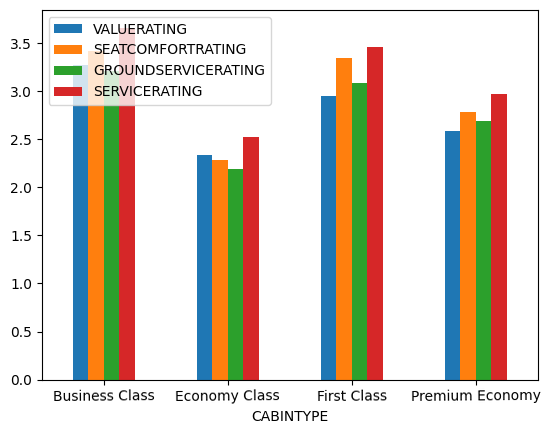

In [388]:
cabin.plot(kind="bar")
plt.xticks(rotation=0.5);

In [433]:
traveler = df.groupby(["TRAVELLER"]).agg(
    {"VALUERATING": "mean", 
     "SEATCOMFORTRATING": "mean",
      "GROUNDSERVICERATING": "mean", 
      "SERVICERATING": "mean"})

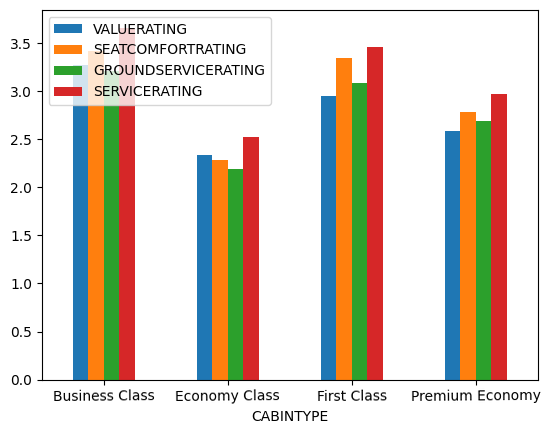

In [434]:
cabin.plot(kind="bar")
plt.xticks(rotation=0.5);

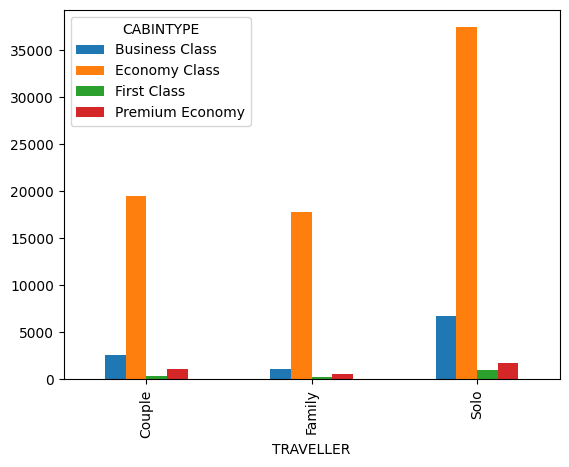

In [391]:
travel_cabin = df.groupby(["TRAVELLER", "CABINTYPE"])["TRAVELLER"].count().unstack().plot(kind="bar")
plt.show()

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90113 entries, 0 to 90112
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AIRLINENAME          90113 non-null  object
 1   CABINTYPE            90113 non-null  object
 2   DATEFLOWN            90113 non-null  object
 3   DATEPUB              90113 non-null  object
 4   ENTERTAINMENTRATING  90113 non-null  int64 
 5   FOODRATING           90113 non-null  int64 
 6   GROUNDSERVICERATING  90113 non-null  int64 
 7   ORIGINCOUNTRY        90113 non-null  object
 8   OVERALLSCORE         90113 non-null  int64 
 9   RECOMMENDED          90113 non-null  object
 10  REVIEW               90113 non-null  object
 11  ROUTE                90113 non-null  object
 12  ORIGIN               90113 non-null  object
 13  DESTINY              90101 non-null  object
 14  SCALE_YN             90113 non-null  int64 
 15  SEATCOMFORTRATING    90113 non-null  int64 
 16  SERV

In [393]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,...,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,OVERSEAS
37243,Iberia,Economy Class,2022-03-01 00:00:00.000000000,28th March 2022,0,0,1,UnitedStates,1,no,...,1,iberia,getting off the plane was even worse,Solo,Leisure,Not Verified,2,0,5799c020-65ff-428b-8a09-50c16e98cf4a,0


In [394]:
from datetime import datetime

df['DATEFLOWN'] = pd.to_datetime(df['DATEFLOWN'],  format='mixed')


In [395]:
df['YEAR'] = df['DATEFLOWN'].dt.year

In [396]:
time = df[(df.DATEFLOWN >= '2010-01-01')]

In [397]:
time.YEAR.value_counts()

YEAR
2019    15199
2018    14040
2022    12142
2016    11847
2017    11481
2015     9734
2021     6329
2020     5529
2023     3557
2014      147
2013        2
2012        1
Name: count, dtype: int64

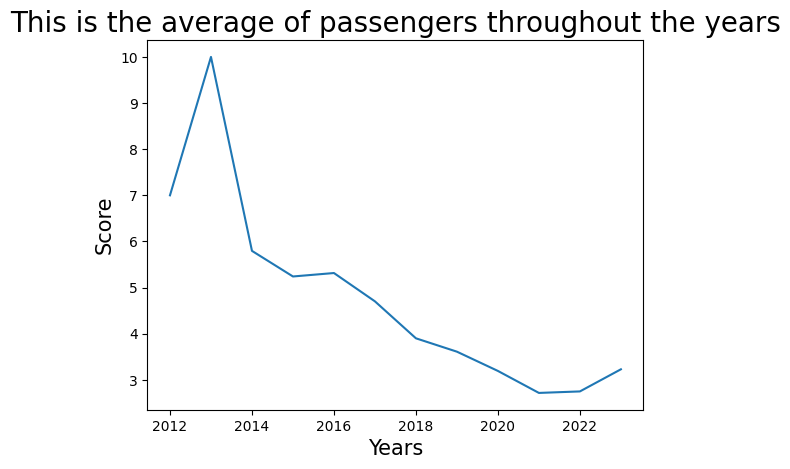

In [398]:
sns.lineplot(data=time, x="YEAR", y="OVERALLSCORE", ci=None); #default: avg
plt.ylabel("Score", fontsize=15);
plt.xlabel("Years", fontsize=15);
plt.title("This is the average of passengers throughout the years", fontsize = 20);

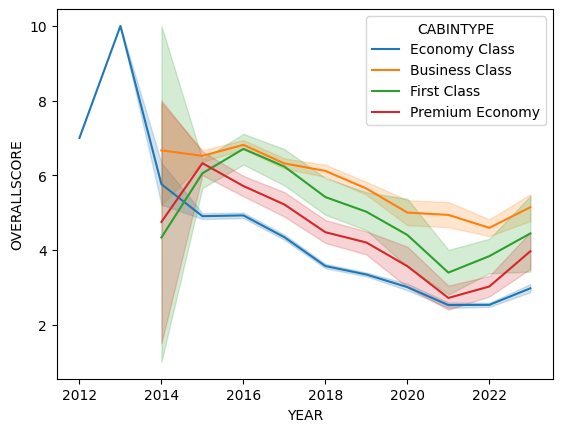

In [399]:
sns.lineplot(data=time, x="YEAR", y="OVERALLSCORE", hue="CABINTYPE");

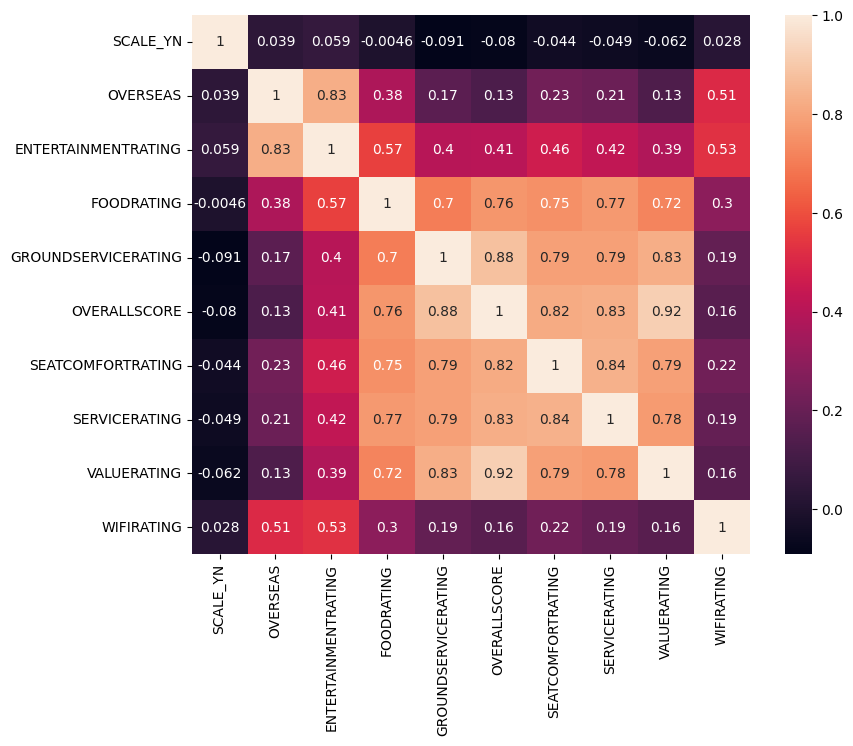

In [400]:
data_corr = grouped.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [401]:
grouped.drop(columns="VALUERATING", inplace=True)
grouped.drop(columns="GROUNDSERVICERATING", inplace=True)

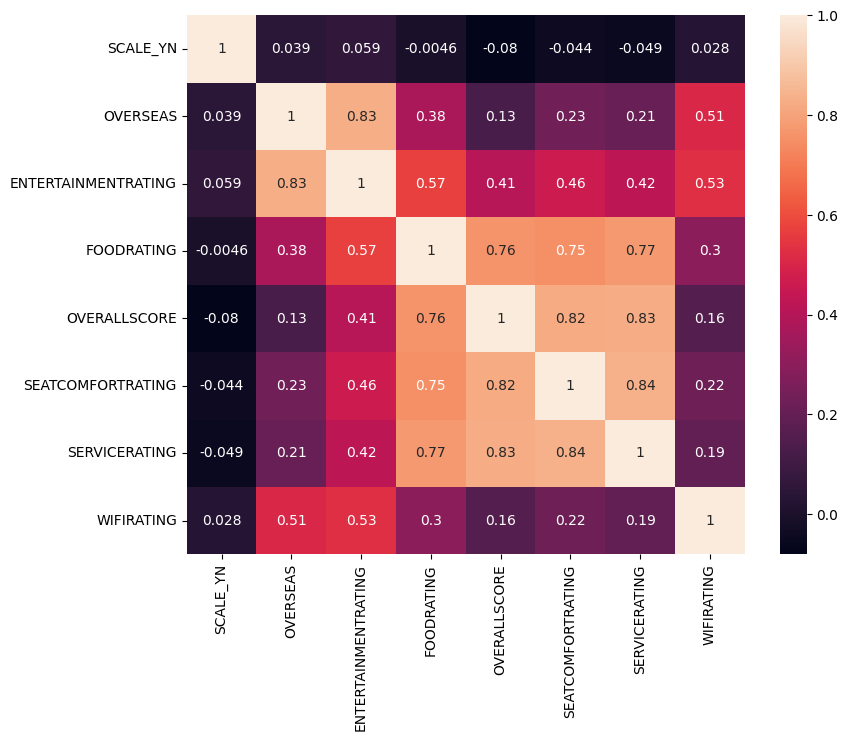

In [402]:
data_corr = grouped.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [403]:
from sklearn.linear_model import LinearRegression

In [404]:
model = LinearRegression().fit(grouped[['SEATCOMFORTRATING']], grouped[['SERVICERATING']])
model.score(grouped[['SEATCOMFORTRATING']], grouped[['SERVICERATING']])

0.7012868497701648

In [405]:
model = LinearRegression().fit(grouped[['FOODRATING']], grouped[['SERVICERATING']])
model.score(grouped[['FOODRATING']], grouped[['SERVICERATING']])

0.59767177835096

In [406]:
#change categoricals string to categorical numbers 1=lowest class and 4=highest class
grouped['CABINTYPE']=np.where(grouped['CABINTYPE']=="Economy Class", 1,grouped.CABINTYPE)
grouped['CABINTYPE']=np.where(grouped['CABINTYPE']=="Premium Economy", 2,grouped.CABINTYPE)
grouped['CABINTYPE']=np.where(grouped['CABINTYPE']=="Business Class", 3,grouped.CABINTYPE) #in order to avoid such an inbalanced class (firstclass few n)
grouped['CABINTYPE']=np.where(grouped['CABINTYPE']=="First Class", 4,grouped.CABINTYPE)

In [407]:
#change the variable traveller to numeric (based on specific order)
grouped['TRAVELLER']=np.where(grouped['TRAVELLER']=="Solo", 1,grouped.TRAVELLER)
grouped['TRAVELLER']=np.where(grouped['TRAVELLER']=="Couple", 2,grouped.TRAVELLER)
grouped['TRAVELLER']=np.where(grouped['TRAVELLER']=="Family", 3,grouped.TRAVELLER)

In [408]:
grouped['CABINTYPE']=grouped['CABINTYPE'].astype(str).astype(int)
grouped['TRAVELLER']=grouped['TRAVELLER'].astype(str).astype(int)

In [409]:
Y=grouped.OVERALLSCORE

In [410]:
x_regression = grouped.drop(columns=['AIRLINENAME', 'SEATCOMFORTRATING', 'WIFIRATING', 'ENTERTAINMENTRATING', 'FOODRATING'])

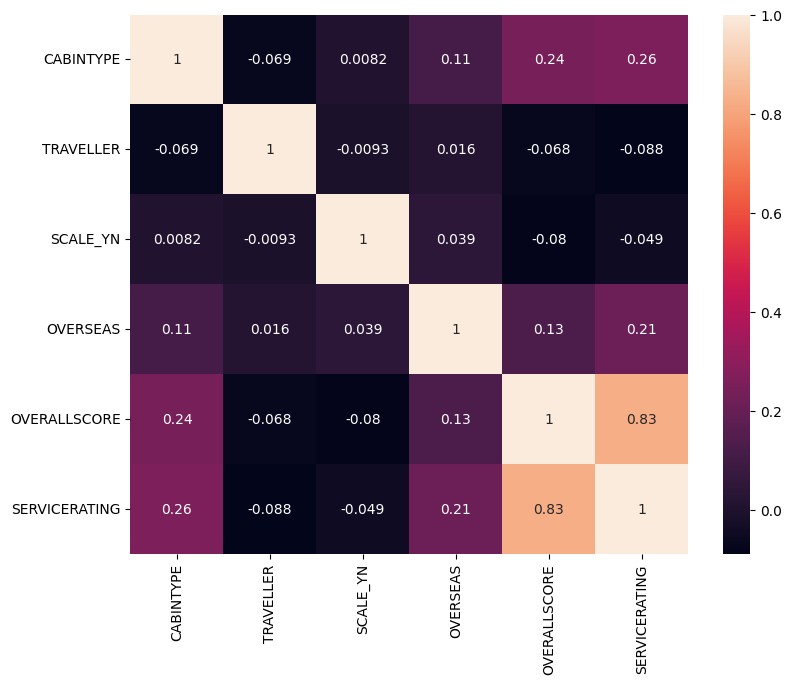

In [411]:
data_corr = x_regression.select_dtypes(np.number)
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [412]:
model = LinearRegression().fit(x_regression[['OVERALLSCORE']], x_regression[['SERVICERATING']])
model.score(x_regression[['OVERALLSCORE']], x_regression[['SERVICERATING']])

0.6827650204548212

In [413]:
x_regression = x_regression.drop(columns=['OVERALLSCORE'])

In [414]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [415]:
x_regression.sample()

,CABINTYPE,TRAVELLER,SCALE_YN,OVERSEAS,SERVICERATING
4722,3,2,0,0,5.0


In [416]:
x_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CABINTYPE      5490 non-null   int32  
 1   TRAVELLER      5490 non-null   int32  
 2   SCALE_YN       5490 non-null   int64  
 3   OVERSEAS       5490 non-null   int32  
 4   SERVICERATING  5490 non-null   float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 150.2 KB


In [417]:
X0 = sm.add_constant(x_regression)
model = sm.OLS(Y,x_regression).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           OVERALLSCORE   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          1.099e+04
Date:                Mon, 24 Jun 2024   Prob (F-statistic):                        0.00
Time:                        20:58:35   Log-Likelihood:                         -10010.
No. Observations:                5490   AIC:                                  2.003e+04
Df Residuals:                    5485   BIC:                                  2.006e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [418]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [419]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x_regression.columns
vif_data["VIF"]=[variance_inflation_factor(x_regression.values, i) for i in range(x_regression.shape[1])]
print(vif_data)

        Variable       VIF
0      CABINTYPE  3.837631
1      TRAVELLER  3.481746
2       SCALE_YN  1.473119
3       OVERSEAS  2.100450
4  SERVICERATING  4.630028


In [420]:
X_train, X_test, y_train, y_test= train_test_split(x_regression,Y, test_size=0.8, random_state=42)

In [421]:
X0 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           OVERALLSCORE   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              2168.
Date:                Mon, 24 Jun 2024   Prob (F-statistic):                        0.00
Time:                        20:58:36   Log-Likelihood:                         -2016.2
No. Observations:                1098   AIC:                                      4042.
Df Residuals:                    1093   BIC:                                      4067.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [422]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [356]:
predictions=lm.predict(X_test)

In [357]:
r2=r2_score(y_test, predictions)
print(r2)

0.6878141637576791


In [358]:
from sklearn.neighbors import KNeighborsRegressor 

In [359]:
prediction=model.predict(X_test)

In [360]:
model2=KNeighborsRegressor(n_neighbors=15)
model2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [361]:
prediction2=model2.predict(X_test)

In [362]:
r2_1=r2_score(y_test, prediction)
r2_2=r2_score(y_test, prediction2)

In [363]:
print(r2_1, r2_2)

0.6878141637576791 0.6956212346051596


In [368]:
model2=KNeighborsRegressor(n_neighbors=80) #with more neighbors, it gives a worse R2
model2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=80)

In [369]:
prediction2=model2.predict(X_test)
r2_1=r2_score(y_test, prediction)
r2_2=r2_score(y_test, prediction2)
print(r2_1, r2_2) 

0.6878141637576791 0.7015887915395188


## RANDOM FOREST CLASSIFIER

In [435]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [436]:
df.head()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,OVERSEAS,YEAR
0,AB Aviation,Economy Class,2019-11-01,11th November 2019,0,4,4,Netherlands,9,yes,Moroni to Moheli. Turned out to be a pretty de...,Moroni to Moheli,Moroni,Moheli,0,4,5,ab-aviation,pretty decent airline,Solo,Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,0,2019
1,AB Aviation,Economy Class,2019-06-01,25th June 2019,0,1,1,UnitedKingdom,1,no,Moroni to Anjouan. It is a very small airline....,Moroni to Anjouan,Moroni,Anjouan,0,2,2,ab-aviation,Not a good airline,Solo,Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,0,2019
2,AB Aviation,Economy Class,2019-06-01,25th June 2019,0,1,1,UnitedKingdom,1,no,Anjouan to Dzaoudzi. A very small airline and ...,Anjouan to Dzaoudzi,Anjouan,Dzaoudzi,0,2,1,ab-aviation,flight was fortunately short,Solo,Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,0,2019
3,AeroItalia,Economy Class,2023-04-01,3rd April 2023,0,1,1,Italy,2,no,Only 1 check-in desk open for a full plane and...,Milano to Olbia,Milano,Olbia,0,1,3,aeroitalia,impossible to check in online,Solo,Bussiness,Trip Verified,1,0,e53686a7-0729-4f27-b653-b0cd8f69c638,0,2023
4,Aero VIP,Economy Class,2019-04-01,3rd May 2019,0,0,5,Portugal,9,yes,Cascais to Bragança with Aero VIP. Services ar...,Cascais to Bragança,Cascais,Bragança,0,4,4,aero-vip,the support was fantastic,Solo,Leisure,Trip Verified,4,0,f319f248-8cb2-4289-9299-f5d1ee1a305e,0,2019


In [578]:
categorical=df[["CONTINENT", "CABINTYPE","TRAVELLER", "PURPOSE", "RECOMMENDED"]]

In [579]:
numbers=df[["FOODRATING", "GROUNDSERVICERATING", "OVERALLSCORE", "SERVICERATING","SCALE_YN", "OVERSEAS", "SEATCOMFORTRATING", "VALUERATING" ]]

In [610]:
encoder = OneHotEncoder(drop='first').fit(categorical)
encoded_categorical = encoder.transform(categorical).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

In [611]:
data = pd.concat([numbers, encoded_categorical], axis = 1)

In [612]:
data.head()

,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SERVICERATING,SCALE_YN,OVERSEAS,SEATCOMFORTRATING,VALUERATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other,CABINTYPE_Economy Class,CABINTYPE_First Class,CABINTYPE_Premium Economy,TRAVELLER_Family,TRAVELLER_Solo,PURPOSE_Leisure,RECOMMENDED_yes
0,4,4,9,5,0,0,4,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1,1,1,2,0,0,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,1,1,1,0,0,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,1,2,3,0,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,5,9,4,0,0,4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [613]:
category_0 = data[data['SCALE_YN']==0].sample(len(data[data['SCALE_YN']==1]))
category_0.shape

category_1 = data[data['SCALE_YN']== 1 ]
data = pd.concat([category_0, category_1], axis = 0)
data = data.sample(frac =1)
data = data.reset_index(drop=True)
data.shape

y = data['SCALE_YN']
X = data.drop(['SCALE_YN'], axis = 1)

In [614]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [615]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [616]:
y_train_regression = X_train['OVERALLSCORE']
y_test_regression = X_test['OVERALLSCORE']

In [617]:
X_train = X_train.drop(['OVERALLSCORE'], axis = 1)
X_test = X_test.drop(['OVERALLSCORE'], axis = 1)

In [618]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100], #nº árboles. Primero son 50 y luego 100.
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt','log2']
#    'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

In [619]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1) 

In [620]:
X_train.columns = X_train.columns.astype(str)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [621]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [622]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.5907439833233178


In [623]:
clf.fit( X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=0)

In [624]:
X_train.head()

,FOODRATING,GROUNDSERVICERATING,SERVICERATING,OVERSEAS,SEATCOMFORTRATING,VALUERATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other,CABINTYPE_Economy Class,CABINTYPE_First Class,CABINTYPE_Premium Economy,TRAVELLER_Family,TRAVELLER_Solo,PURPOSE_Leisure,RECOMMENDED_yes
21231,5,4,5,1,4,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
36935,4,5,4,1,4,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3182,0,1,1,0,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25200,4,5,5,1,5,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
36640,4,1,4,0,3,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [626]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [627]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
0,FOODRATING,0.151607
4,SEATCOMFORTRATING,0.125288
1,GROUNDSERVICERATING,0.123773
2,SERVICERATING,0.121206
5,VALUERATING,0.111996
3,OVERSEAS,0.109769
15,TRAVELLER_Solo,0.037516
11,CABINTYPE_Economy Class,0.032795
14,TRAVELLER_Family,0.030292
16,PURPOSE_Leisure,0.028992


In [628]:
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
0,FOODRATING,0.151607
4,SEATCOMFORTRATING,0.125288
1,GROUNDSERVICERATING,0.123773
2,SERVICERATING,0.121206
5,VALUERATING,0.111996
3,OVERSEAS,0.109769
15,TRAVELLER_Solo,0.037516
11,CABINTYPE_Economy Class,0.032795
14,TRAVELLER_Family,0.030292
16,PURPOSE_Leisure,0.028992


In [629]:
def importancia (model, X_train):
    
    feature_names = X_train.columns
    feature_names = list(feature_names)
    df = pd.DataFrame(list(zip(feature_names, model.feature_importances_)))
    df.columns = ['columns_name', 'score_feature_importance']
    df_importante=df[df.score_feature_importance>0]
    return df_importante.sort_values(by=['score_feature_importance'], ascending = False)


In [630]:
X_train.columns = X_train.columns 

In [631]:
X_train

,FOODRATING,GROUNDSERVICERATING,SERVICERATING,OVERSEAS,SEATCOMFORTRATING,VALUERATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other,CABINTYPE_Economy Class,CABINTYPE_First Class,CABINTYPE_Premium Economy,TRAVELLER_Family,TRAVELLER_Solo,PURPOSE_Leisure,RECOMMENDED_yes
21231,5,4,5,1,4,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
36935,4,5,4,1,4,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3182,0,1,1,0,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25200,4,5,5,1,5,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
36640,4,1,4,0,3,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,4,4,5,1,4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
45891,4,4,4,1,4,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
42613,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
43567,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [634]:
importancia (clf,X_train)

,columns_name,score_feature_importance
0,FOODRATING,0.151607
4,SEATCOMFORTRATING,0.125288
1,GROUNDSERVICERATING,0.123773
2,SERVICERATING,0.121206
5,VALUERATING,0.111996
3,OVERSEAS,0.109769
15,TRAVELLER_Solo,0.037516
11,CABINTYPE_Economy Class,0.032795
14,TRAVELLER_Family,0.030292
16,PURPOSE_Leisure,0.028992


In [635]:
import matplotlib.pyplot as plt
import seaborn as sns 

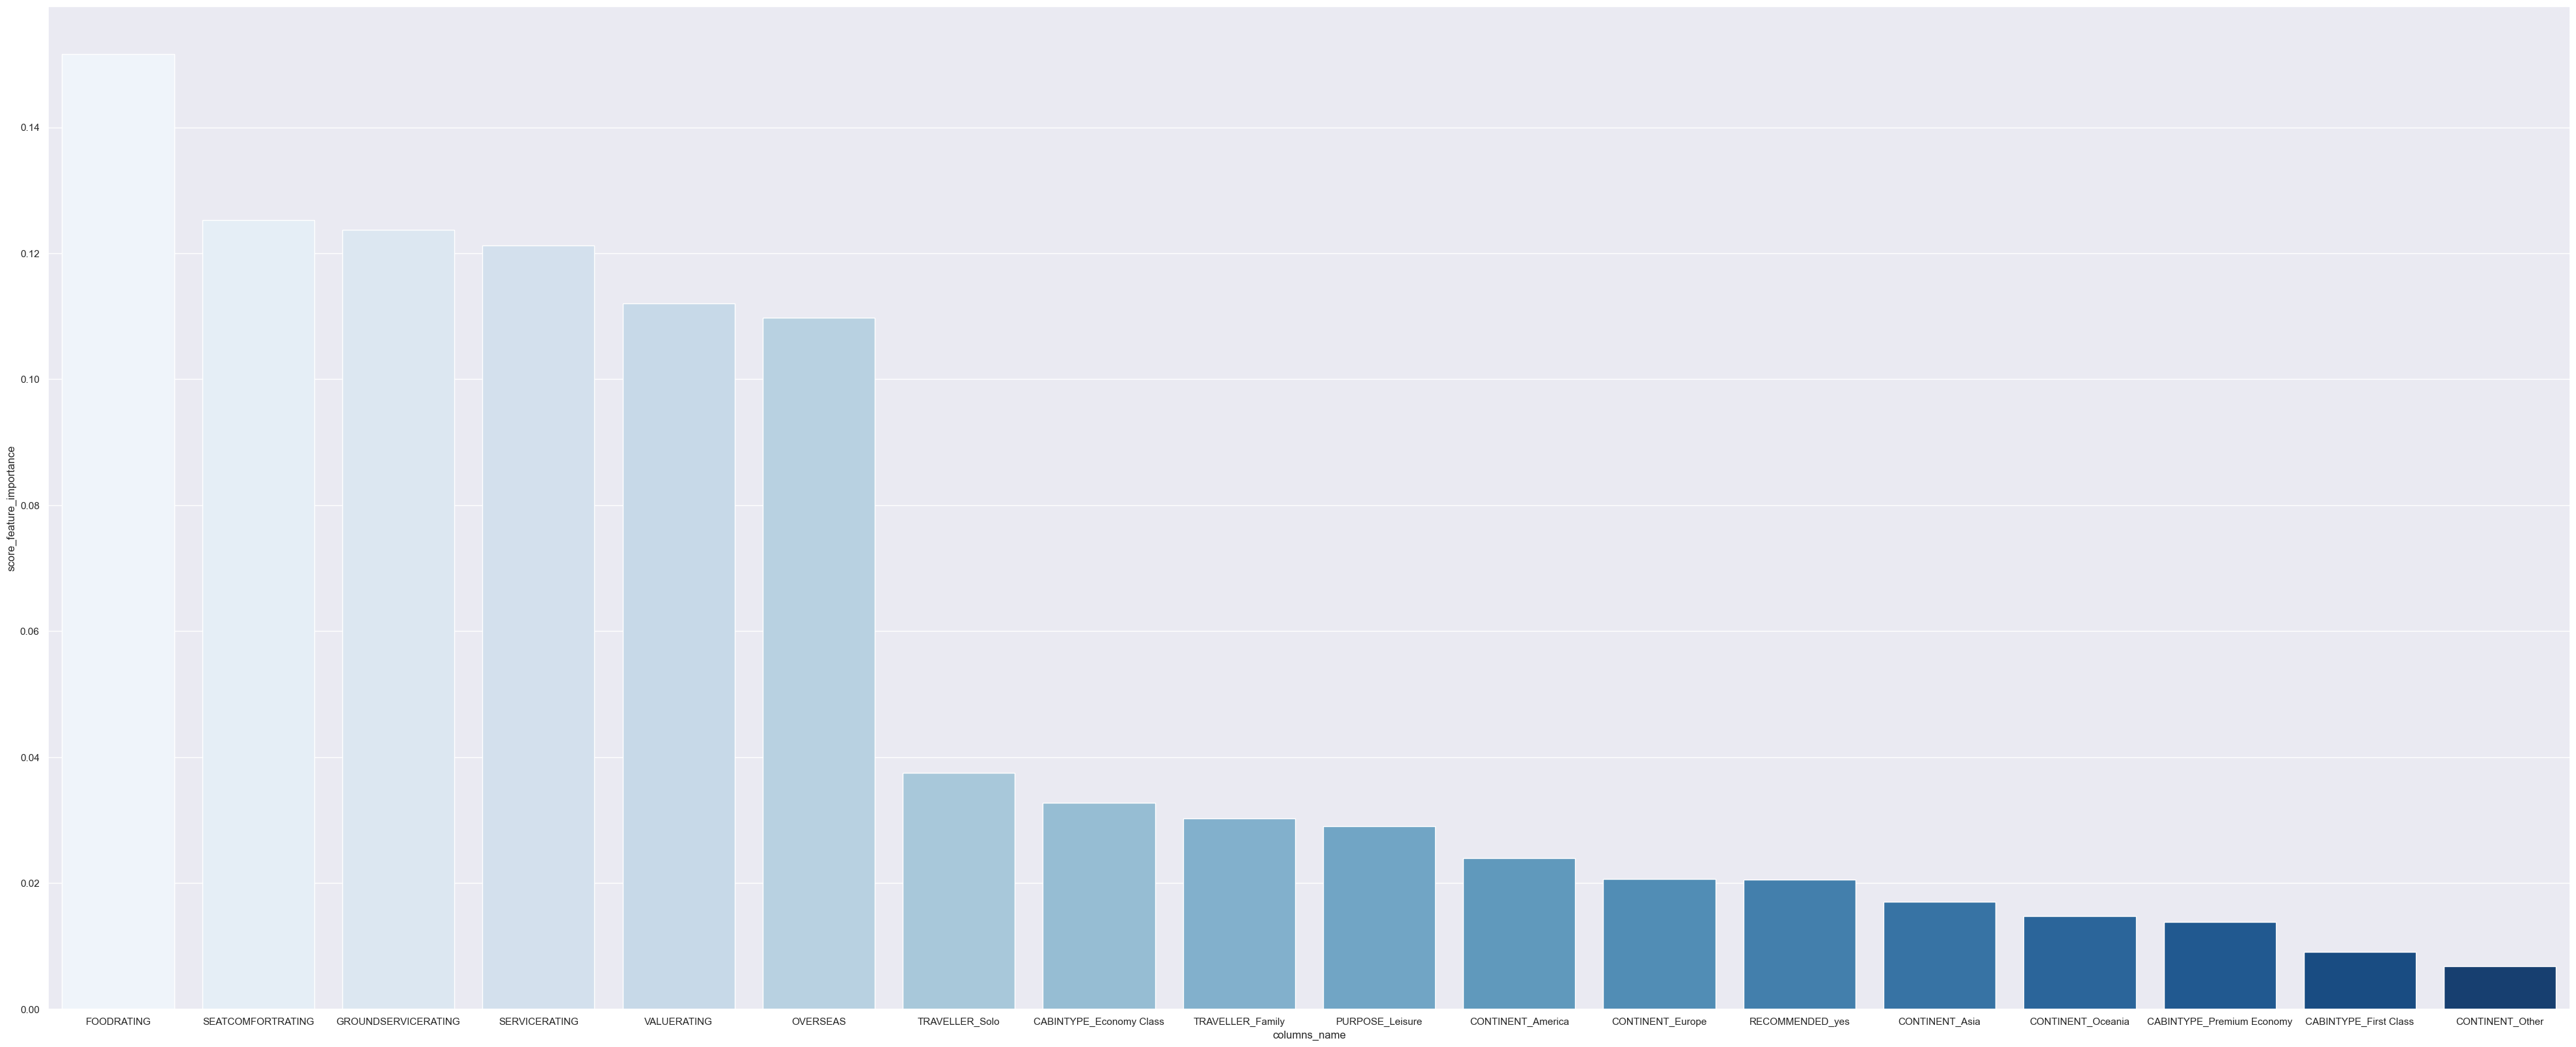

In [638]:
df2=df[df.score_feature_importance>0.006].sort_values(by=['score_feature_importance'], ascending = False)
sns.barplot(df2, x="columns_name", y="score_feature_importance", palette="Blues")
sns.set(rc = {'figure.figsize':(60,20)})

In [542]:
#FUNCION PARA DEVOLVER CONTINENTES CUANDO LE DAMOS PAISES EN UN DF

def continente(pais):
    asia=['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'China','Vietnam', 'Taiwan','Korea', 'Japan', 'Mongolia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka','Brunei', 'Darussalam', 'Cambodia', 'Indonesia', 'Lao', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam', 'Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Palestine', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
    europe= ['Albania' ,'Andorra' ,'Austria' ,'Belarus' ,'Belgium' ,'Czech Republic ','Bosnia Herzegovina' ,'Bulgaria' ,'Croatia' ,'Cyprus' ,'Czech' ,'Denmark' ,'Estonia' ,'Finland' ,'France' ,'Germany' ,'Greece' ,'Hungary' ,'Iceland' ,'Ireland' ,'Italy' ,'Latvia' ,'Liechtenstein' ,'Lithuania' ,'Luxembourg' ,'Malta' ,'Moldova' ,'Monaco' ,'Montenegro' ,'Netherlands' ,'North' ,'Macedonia' ,'Norway' ,'Poland' ,'Portugal' ,'Romania' ,'Russia' ,'San Marino' ,'Serbia' ,'Slovakia' ,'Slovenia' ,'Spain' ,'Sweden' ,'Switzerland' ,'Ukraine' ,'United Kingdom']
    africa=['Lesotho', 'Swaziland', 'Botswana', 'Namibia', 'South Africa', 'Angola', 'Cameroon', 'Equatorial Guinea', 'Gabon', 'Congo', 'Chad', 'Central African Republic', 'Congo', 'Sao Tome and Principe', 'Burundi', 'Eritrea', 'Madagascar', 'Reunion', 'Somalia', 'Comoros', 'Ethiopia', 'Rwanda', 'Djibouti', 'Kenya', 'Mayotte', 'Seychelles', 'Uganda', 'Mozambique', 'Zambia', 'Malawi', 'Tanzania', 'Zimbabwe', 'Benin', 'Liberia', 'Saint Helena', 'Burkina Faso', 'Gambia', 'Mali', 'Ghana', 'Mauritania', 'Senegal', 'Cape Verde', 'Cote Divoire', 'Guinea', 'Niger', 'Sierra Leone', 'Guinea-Bissau', 'Nigeria', 'Togo', 'Algeria', 'Egypt', 'Libyan ', 'Morocco', 'Tunisia', 'Sahara', 'Sudan']
    america=['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Bajo Nuevo Bank', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Bonaire', 'Brazil', 'British Virgin Islands', 'Canada', ' Cayman Islands', 'Chile', ' Clipperton Island', 'Colombia', ' Costa Rica', 'Cuba', 'Curaçao', 'Dominica', ' Dominican Republic', 'Ecuador', ' El Salvador', ' Falkland Islands', ' Federal Dependencies of Venezuela', ' French Guiana', 'Greenland', 'Grenada', 'Guadeloupe ', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Montserrat', 'Navassa Island', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', ' Puerto Rico', 'Saba', ' Saint Barthélemy', 'Saint Kitts and Nevis', ' Saint Lucia', ' Saint Martin', ' Saint Pierre and Miquelon', ' Saint Vincent and the Grenadines', 'Serranilla Bank', ' Sint Eustatius', ' Sint Maarten', 'South Georgia', 'South Sandwich Islands', 'Suriname', ' Trinidad and Tobago', 'Turks and Caicos Islands', 'United States of America', 'United States', 'USA', 'U.S.A.', ' U.S. Virgin Islands', 'Uruguay', 'Venezuela']
    oceania=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

    if pais in asia:
        return "Asia"
    elif pais in europe:
        return "Europe"
    elif pais in africa:
        return "Africa"
    elif pais in america:
        return "America"
    elif pais in oceania:
        return "Oceania"
    else:
        return "Other"
    

In [543]:
df.sample()

,Unnamed: 0,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,Continente
57095,57234,Rossiya Airlines,Economy Class,2020-03-01 00:00:00.000000000,29th March 2020,0,3,3,Russian Federation,2,no,Bangkok to Moscow with Rossiya Airlines. Not t...,Bangkok to Moscow,Bangkok,Moscow,0,1,3,rossiya-airlines,totally not worth it,Solo,Leisure,Trip Verified,1,0,2e55cd8a-2414-47f0-9d0b-6da5739fea30,Other


In [544]:
df=pd.read_csv("datasets/cleandf.csv", parse_dates=['DATEFLOWN'])

In [545]:
df["ORIGINCOUNTRY"].replace("UnitedStates","United States", inplace=True)
df["ORIGINCOUNTRY"].replace("UnitedKingdom","United Kingdom", inplace=True)
df["ORIGINCOUNTRY"].replace("CzechRepublic","Czech Republic", inplace=True)
df["ORIGINCOUNTRY"].replace("RussianFederation","Russian Federation", inplace=True)
df["ORIGINCOUNTRY"].replace("UnitedArabEmirates","United Arab Emirates", inplace=True)
df["ORIGINCOUNTRY"].replace("NetherlandsAntilles","Netherlands Antilles", inplace=True)
df["ORIGINCOUNTRY"].replace("SouthAfrica","South Africa", inplace=True)
df["ORIGINCOUNTRY"].replace("SaudiArabia","Saudi Arabia", inplace=True)
df["ORIGINCOUNTRY"].replace("HongKong","China", inplace=True)
df["ORIGINCOUNTRY"].replace("NewZealand","New Zealand", inplace=True)
df["ORIGINCOUNTRY"].replace("SouthKorea","South Korea", inplace=True)
df["ORIGINCOUNTRY"].replace("CostaRica","Costa Rica", inplace=True)
df["ORIGINCOUNTRY"].replace("AntiguaandBarbuda","Antigua and Barbuda", inplace=True)
df["ORIGINCOUNTRY"].replace("TurksandCaicosIslands","Turks and Caicos Islands", inplace=True)
df["ORIGINCOUNTRY"].replace("SriLanka","Sri Lanka", inplace=True)
df["ORIGINCOUNTRY"].replace("CaymanIslands","Cayman Islands", inplace=True)
df["ORIGINCOUNTRY"].replace("PuertoRico","Puerto Rico", inplace=True)
df["ORIGINCOUNTRY"].replace("ElSalvador","El Salvador", inplace=True)

In [552]:
df['CONTINENT'] = df['ORIGINCOUNTRY'].apply(lambda x: continente(x))

In [553]:
df.CONTINENT.value_counts()

Continente
America    40290
Europe     26407
Asia       13087
Oceania     7771
Africa      1309
Other       1249
Name: count, dtype: int64

In [554]:
df[df.CONTINENT=='Other'].ORIGINCOUNTRY.nunique()

43

In [555]:
df[df.CONTINENT=='Other'].ORIGINCOUNTRY.unique()

array(['Czech Republic', 'Russian Federation', 'Netherlands Antilles',
       'Mauritius', 'Guam', 'South Korea', 'Guadeloupe', 'Costa Rica',
       'Libya', 'DominicanRepublic', 'Puerto Rico', 'El Salvador', 'Laos',
       'Macau', 'Réunion', 'PapuaNewGuinea', 'FrenchPolynesia',
       'NewCaledonia', 'Niue', 'SierraLeone', 'Cayman Islands',
       'BosniaandHerzegovina', 'DemocraticRepublicoftheCongo',
       'TrinidadTobago', 'FalklandIslands', 'AmericanSamoa',
       'UnitedStatesMinorOutlyingIslands', 'USVirginIslands',
       'PalestinianTerritories', 'BurkinaFaso', 'SaintKittsandNevis',
       'EastTimor', 'CôtedIvoire', 'Gibraltar', 'EquatorialGuinea',
       'BritishVirginIslands', 'NorfolkIsland',
       'SaintVincentandtheGrenadines', 'HeardIslandandMcDonaldIslands',
       'CapeVerde', 'SouthGeorgiaandtheSouthSandwichIslands',
       'SaintLucia', 'Tokelau'], dtype=object)

In [557]:
df[df.CONTINENT=='Other'].ORIGINCOUNTRY.value_counts()

ORIGINCOUNTRY
Czech Republic                            386
Russian Federation                        319
South Korea                               183
Puerto Rico                                48
Costa Rica                                 40
TrinidadTobago                             33
PapuaNewGuinea                             24
Mauritius                                  20
DominicanRepublic                          20
Laos                                       18
BosniaandHerzegovina                       18
SierraLeone                                17
USVirginIslands                            12
Macau                                      11
Cayman Islands                             10
PalestinianTerritories                      8
Netherlands Antilles                        7
El Salvador                                 7
NewCaledonia                                7
DemocraticRepublicoftheCongo                6
Réunion                                     6
FrenchPolynesia     